In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from itertools import combinations

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saifhaddad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saifhaddad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv('Complaints dataset.csv')

df.head(10)

/var/folders/sb/6phfnpsd4vbd52mr5kht86kw0000gn/T/ipykernel_97136/3747072394.py:1: DtypeWarning: Columns (17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Complaints dataset.csv')


OFFER_NAME CUSTOMER_TYPE COMPLAINT_TYPE   PRODUCT  \
0                     FTTH Home           CBU      Technical  Internet   
1                           NaN           CBU      Technical    Mobile   
2  Super 4G on the go 100GB new           CBU     Commercial    Mobile   
3                 Pro Bitstream           CBU      Technical  Internet   
4                     FTTH Home           CBU      Technical  Internet   
5                     FTTH Home           CBU      Technical  Internet   
6                     FTTH Home           CBU      Technical  Internet   
7                     FTTH Home           CBU      Technical  Internet   
8                     FTTH Home           CBU      Technical  Internet   
9                     FTTH Home           CBU      Technical  Internet   

          CASE_LEVEL_1               CASE_LEVEL_2  \
0  Technical complaint  TC_INTERNET_CONFIGURATION   
1  Technical complaint      TC_INTERNET_CONNEXION   
2     Commercial claim                  CC_Offers   
3  Technical complaint                 TC_Network   
4  Technical complaint                 TC_Network   
5  Technical complaint                 TC_Network   
6  Technical complaint                 TC_Network   
7  Technical complaint  TC_INTERNET_CONFIGURATION   
8  Technical complaint  TC_INTERNET_CONFIGURATION   
9  Technical complaint  TC_INTERNET_CONFIGURATION   

                                       CASE_LEVEL_3     CUSTOMER_GROUP  \
0              SNW-FTTH - WAN configuration / Tools          FTTH Home   
1                       4G - Frequent Disconnection                NaN   
2  Embedded Bundle - Didn't Get The Monthly Bundles  Family Mobile-IEW   
3                         SNW-ADSL-Individual fault       Internet SME   
4                       SNW-FTTH - Down interrupted          FTTH Home   
5                       SNW-FTTH - Down interrupted          FTTH Home   
6                       SNW-FTTH - Down interrupted          FTTH Home   
7                        SNW-FTTH - Never connected          FTTH Home   
8                        SNW-FTTH - Never connected          FTTH Home   
9                        SNW-FTTH - Never connected          FTTH Home   

  CURRENT_STATUS ESCALATION_FLAG  ...                 CLOSE_USER AGE_BRACKET  \
0       Resolved              No  ...     SSO.CRC.DEENA MOHAMMAD         1.0   
1       Resolved             Yes  ...          Saed Al-Haj Ahmad         1.0   
2       Resolved             Yes  ...               ENNAS SAMMAN         1.0   
3       Resolved              No  ...      SSO.CRC.HAZAR OBEIDAT         1.0   
4       Resolved              No  ...  SSO.CRC.KHALEDAH TAWABINI         1.0   
5       Resolved              No  ...  SSO.CRC.KHALEDAH TAWABINI         1.0   
6       Resolved              No  ...      SSO.PH.ASEEL MUPEDEEN         1.0   
7       Resolved             Yes  ...       SSO.THAMER ALAWAIDEH         1.0   
8       Resolved             Yes  ...             SAMER KHREISAT         1.0   
9       Resolved              No  ...      SSO.PH.ASEEL MUPEDEEN         1.0   

   ACTUAL_COMPLAINT CALLBACK_MECHANISM  \
0   User Not Filled                NaN   
1  Actual Complaint                SMS   
2  Actual Complaint                SMS   
3   User Not Filled                NaN   
4   User Not Filled                NaN   
5   User Not Filled                NaN   
6   User Not Filled                NaN   
7  Actual Complaint              Phone   
8  Actual Complaint              Phone   
9   User Not Filled                NaN   

                                          RESOLUTION  \
0                                                NaN   
1           Coverage script was sent to the customer   
2                                IEW offer -no link    
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7              

In [4]:
null_counts = df.isna().sum()

print(null_counts)


OFFER_NAME                 12430
CUSTOMER_TYPE                  4
COMPLAINT_TYPE                 1
PRODUCT                        0
CASE_LEVEL_1                   5
CASE_LEVEL_2                   6
CASE_LEVEL_3                   6
CUSTOMER_GROUP             12228
CURRENT_STATUS                 0
ESCALATION_FLAG                0
CASE_ID                        0
ESCALATED_GROUP           189317
OPEN_DATE                      0
OPEN_USER                      0
CLOSE_DATE                  2287
CLOSE_GROUP               136362
CLOSE_USER                  2287
AGE_BRACKET                 2287
ACTUAL_COMPLAINT               0
CALLBACK_MECHANISM        192986
RESOLUTION                192884
RESOLUTION_DESCRIPTION    192884
CASE_DESC                      0
OPEN_GR                   135114
Unnamed: 24               276268
Unnamed: 25               276265
dtype: int64


In [5]:
df.head(10)

OFFER_NAME CUSTOMER_TYPE COMPLAINT_TYPE   PRODUCT  \
0                     FTTH Home           CBU      Technical  Internet   
1                           NaN           CBU      Technical    Mobile   
2  Super 4G on the go 100GB new           CBU     Commercial    Mobile   
3                 Pro Bitstream           CBU      Technical  Internet   
4                     FTTH Home           CBU      Technical  Internet   
5                     FTTH Home           CBU      Technical  Internet   
6                     FTTH Home           CBU      Technical  Internet   
7                     FTTH Home           CBU      Technical  Internet   
8                     FTTH Home           CBU      Technical  Internet   
9                     FTTH Home           CBU      Technical  Internet   

          CASE_LEVEL_1               CASE_LEVEL_2  \
0  Technical complaint  TC_INTERNET_CONFIGURATION   
1  Technical complaint      TC_INTERNET_CONNEXION   
2     Commercial claim                  CC_Offers   
3  Technical complaint                 TC_Network   
4  Technical complaint                 TC_Network   
5  Technical complaint                 TC_Network   
6  Technical complaint                 TC_Network   
7  Technical complaint  TC_INTERNET_CONFIGURATION   
8  Technical complaint  TC_INTERNET_CONFIGURATION   
9  Technical complaint  TC_INTERNET_CONFIGURATION   

                                       CASE_LEVEL_3     CUSTOMER_GROUP  \
0              SNW-FTTH - WAN configuration / Tools          FTTH Home   
1                       4G - Frequent Disconnection                NaN   
2  Embedded Bundle - Didn't Get The Monthly Bundles  Family Mobile-IEW   
3                         SNW-ADSL-Individual fault       Internet SME   
4                       SNW-FTTH - Down interrupted          FTTH Home   
5                       SNW-FTTH - Down interrupted          FTTH Home   
6                       SNW-FTTH - Down interrupted          FTTH Home   
7                        SNW-FTTH - Never connected          FTTH Home   
8                        SNW-FTTH - Never connected          FTTH Home   
9                        SNW-FTTH - Never connected          FTTH Home   

  CURRENT_STATUS ESCALATION_FLAG  ...                 CLOSE_USER AGE_BRACKET  \
0       Resolved              No  ...     SSO.CRC.DEENA MOHAMMAD         1.0   
1       Resolved             Yes  ...          Saed Al-Haj Ahmad         1.0   
2       Resolved             Yes  ...               ENNAS SAMMAN         1.0   
3       Resolved              No  ...      SSO.CRC.HAZAR OBEIDAT         1.0   
4       Resolved              No  ...  SSO.CRC.KHALEDAH TAWABINI         1.0   
5       Resolved              No  ...  SSO.CRC.KHALEDAH TAWABINI         1.0   
6       Resolved              No  ...      SSO.PH.ASEEL MUPEDEEN         1.0   
7       Resolved             Yes  ...       SSO.THAMER ALAWAIDEH         1.0   
8       Resolved             Yes  ...             SAMER KHREISAT         1.0   
9       Resolved              No  ...      SSO.PH.ASEEL MUPEDEEN         1.0   

   ACTUAL_COMPLAINT CALLBACK_MECHANISM  \
0   User Not Filled                NaN   
1  Actual Complaint                SMS   
2  Actual Complaint                SMS   
3   User Not Filled                NaN   
4   User Not Filled                NaN   
5   User Not Filled                NaN   
6   User Not Filled                NaN   
7  Actual Complaint              Phone   
8  Actual Complaint              Phone   
9   User Not Filled                NaN   

                                          RESOLUTION  \
0                                                NaN   
1           Coverage script was sent to the customer   
2                                IEW offer -no link    
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7              

In [6]:
Query = '  مشكله في الانترنت '

In [7]:
df['CASE_DESC'] = df['CASE_DESC'].str.lower()

df['CASE_DESC'] = df['CASE_DESC'].str.replace(r'\s+', ' ', regex=True)
df['CASE_DESC'] = df['CASE_DESC'].str.strip()

df = df.drop_duplicates(subset='CASE_DESC')

df = df.reset_index(drop=True)

In [8]:
def is_single_word(text):
    return len(text.split()) == 1

df = df[~df['CASE_DESC'].apply(is_single_word)]

df = df.reset_index(drop=True)

In [9]:
#https://medium.com/@madjidmain/how-to-implement-sentiment-analysis-on-arabic-using-python-22141db5bd92
# Define Arabic and English punctuations
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Define Arabic stopwords
stop_words = set(stopwords.words('arabic'))

# Regular expression for Arabic diacritics
arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

In [10]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')


def preprocess_text(text):
    
    # Remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # Remove Arabic diacritics
    text = re.sub(arabic_diacritics, '', text)

    # Remove punctuations
    text = ''.join([char for char in text if char not in punctuations])

    # Normalize some Arabic characters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Lowercase conversion for English tokens
    tokens = [token.lower() for token in tokens]

    # Stopword removal for both English and Arabic
    stop_words = set(stopwords.words('english')) | set(stopwords.words('arabic'))
    tokens = [token for token in tokens if token not in stop_words]

    # Punctuation removal
    tokens = [token for token in tokens if re.match(r'\w', token)]

    # Stemming (Note: This is only for English; Arabic would need a different stemmer)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Joining tokens back into text
    processed_text = ' '.join(tokens)
    return processed_text


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saifhaddad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saifhaddad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df = df.drop_duplicates(subset='CASE_DESC')

df = df.reset_index(drop=True)


In [12]:
df = df.drop_duplicates()

df = df.reset_index(drop=True)




In [13]:
preprocessed_documents = [preprocess_text(doc) for doc in df['CASE_DESC']]
preprocessed_query = preprocess_text(Query)

In [14]:
preprocessed_df = pd.DataFrame(preprocessed_documents, columns=['Preprocessed CASE_DESC'])


In [15]:
preprocessed_df = preprocessed_df.drop_duplicates(subset='Preprocessed CASE_DESC')


In [16]:
preprocessed_df = preprocessed_df[~preprocessed_df['Preprocessed CASE_DESC'].apply(lambda text: len(text.split()) == 1)]

preprocessed_df = preprocessed_df.reset_index(drop=True)

In [17]:
preprocessed_documents = preprocessed_df['Preprocessed CASE_DESC'].tolist()


In [18]:
preprocessed_documents = preprocessed_df['Preprocessed CASE_DESC'].tolist()

filename = 'preprocessed_documents.txt'

# Write the list to a text file
with open(filename, 'w') as file:
    for document in preprocessed_documents:
        file.write(document + '\n')

# Code to download the file in a Jupyter notebook environment
import os
from IPython.display import FileLink

# Create a link to download the file
download_link = FileLink(filename, result_html_prefix="Click here to download: ")
display(download_link)


/Users/saifhaddad/Desktop/Uni/Third Year First Sem/Data Mining /Mid tearm/preprocessed_documents.txt

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_documents = vectorizer.fit_transform(preprocessed_documents)

tfidf_query = vectorizer.transform([preprocessed_query])


In [20]:
euclidean_distance = euclidean_distances(tfidf_query, tfidf_documents)
normalized_euclidean_distance = (euclidean_distance - euclidean_distance.min()) / (euclidean_distance.max() - euclidean_distance.min())


In [21]:
print(normalized_euclidean_distance)

[[1. 1. 1. ... 1. 1. 1.]]


In [22]:
manhattan_distance = manhattan_distances(tfidf_query, tfidf_documents)
normalized_manhattan_distance = (manhattan_distance - manhattan_distance.min()) / (manhattan_distance.max() - manhattan_distance.min())

In [23]:
cosine_distance = cosine_similarity(tfidf_query, tfidf_documents)

In [24]:
preprocessed_df = pd.DataFrame(preprocessed_documents, columns=['Preprocessed CASE_DESC'])


In [25]:
preprocessed_df.head(20)

Preprocessed CASE_DESC
0                         اعاده برمجه النظامbi sultan
1   عدم التصفح وسوء الخدمه والرجاء اتخاذ قرار سكان...
2   activ date sep 22 2022 يتم اضافه الحزم رقم الت...
3   never connect ont unknowncontact number 077715...
4        never connect ontunknown07994746460790205560
5          never connect ontاعاده الاتصال جانب المودم
6   never connect ontالمشترك رافع السرعه وتم الدخو...
7   never connect ontالمشترك يستطيع الدخول للموقع ...
8   never connect ontمشكله برمجيه علي الموديممسجله...
9                                        reduc robust
10  reduc robust minimum 2921 dbmmaximum 2824 dbma...
11                   unknown int0414380aft upgrad 200
12  search queri int0189787 didnt return result er...
13  search queri int0816843 didnt return result er...
14  search queri int0822702 didnt return result er...
15  217 تاريخ استلام الخطjood 07751388778996277010...
16  الزرقاء حي السخنه اسكان الكوثر 321383849989663...
17  عمان حي الربوه اسكان المرقب شارع بيت الحرام319...
18  775195053 رقم التواصل 778014693 رقم الاشتراك 3...
19  تاريخ استلام الخط 12 7 رقم الخط 0775118865 الر...

In [26]:
results_df=pd.DataFrame({"Preprocessed CASE_DESC" : preprocessed_df["Preprocessed CASE_DESC"],
              "Euclidean Distances" : normalized_euclidean_distance.flatten(),
              "Manhattan Distances" : normalized_manhattan_distance.flatten(),
              "Cosine Similarity" : cosine_distance.flatten()})


# Sorting by Cosine Similarity in ascending order
sorted_cosine = results_df.sort_values(by='Cosine Similarity', ascending=False)
sorted_Euclidean = results_df.sort_values(by='Euclidean Distances', ascending=False)
sorted_Manhattan = results_df.sort_values(by='Manhattan Distances', ascending=False)

print(sorted_cosine['Preprocessed CASE_DESC'].head())

#n = 5  # Number of top results to print

#print("Top", n, "results sorted by Cosine Similarity:")
#print(sorted_cosine.head(n))

#print("\nTop", n, "results sorted by Euclidean Distances:")
#print(sorted_Euclidean.head(n))

#print("\nTop", n, "results sorted by Manhattan Distances:")
#print(sorted_Manhattan.head(n))

118607             مشكله الانترنت
114187        يوجد مشكله الانترنت
118645        مشكله شبكه الانترنت
114178    يوجد مشكله علي الانترنت
125577       يعاني مشكله الانترنت
Name: Preprocessed CASE_DESC, dtype: object


In [27]:
sorted_cosine


Preprocessed CASE_DESC  \
118607                                     مشكله الانترنت   
114187                                يوجد مشكله الانترنت   
118645                                مشكله شبكه الانترنت   
114178                            يوجد مشكله علي الانترنت   
125577                               يعاني مشكله الانترنت   
...                                                   ...   
42285                     اربدالكوره بالقرب مسجد ابن تيمه   
42284   اربدالكورهدير لبي سعيدقربمسجد الصالحين32491726...   
42283                         اربدالطيبه مركز دفاع المدني   
42282                   اربدالصريحقرب نادي الطلبه السعودي   
126625  ءعربي اسلامي بالشحن بدل دفع الفاتوره 29 بالحن ...   

        Euclidean Distances  Manhattan Distances  Cosine Similarity  
118607             0.000000             0.000000           1.000000  
114187             0.430426             0.054331           0.814733  
118645             0.486292             0.063253           0.763520  
114178             0.488324             0.079693           0.761540  
125577             0.505391             0.066382           0.744580  
...                     ...                  ...                ...  
42285              1.000000             0.226942           0.000000  
42284              1.000000             0.220244           0.000000  
42283              1.000000             0.216624           0.000000  
42282              1.000000             0.219271           0.000000  
126625             1.000000             0.275396           0.000000  

[126626 rows x 4 columns]

In [28]:
pip install arabic-reshaper python-bidi


Note: you may need to restart the kernel to use updated packages.


In [29]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.DiGraph()
import arabic_reshaper


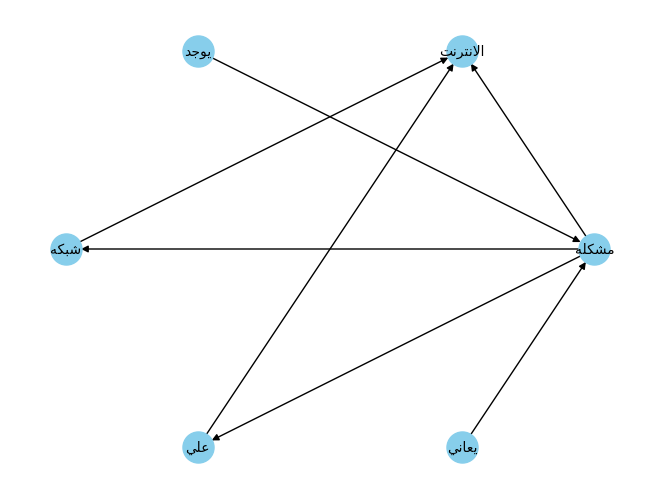

PageRank: {'ﻪﻠﻜﺸﻣ': 0.20776393262479373, 'ﺖﻧﺮﺘﻧﻻﺍ': 0.36670324993740744, 'ﺪﺟﻮﻳ': 0.07694987157780299, 'ﻪﻜﺒﺷ': 0.1358165371410964, 'ﻲﻠﻋ': 0.1358165371410964, 'ﻲﻧﺎﻌﻳ': 0.07694987157780299}
Degree Centrality: {'ﻪﻠﻜﺸﻣ': 1.0, 'ﺖﻧﺮﺘﻧﻻﺍ': 0.6000000000000001, 'ﺪﺟﻮﻳ': 0.2, 'ﻪﻜﺒﺷ': 0.4, 'ﻲﻠﻋ': 0.4, 'ﻲﻧﺎﻌﻳ': 0.2}
Betweenness Centrality: {'ﻪﻠﻜﺸﻣ': 0.30000000000000004, 'ﺖﻧﺮﺘﻧﻻﺍ': 0.0, 'ﺪﺟﻮﻳ': 0.0, 'ﻪﻜﺒﺷ': 0.0, 'ﻲﻠﻋ': 0.0, 'ﻲﻧﺎﻌﻳ': 0.0}
Closeness Centrality: {'ﻪﻠﻜﺸﻣ': 0.4, 'ﺖﻧﺮﺘﻧﻻﺍ': 0.7142857142857143, 'ﺪﺟﻮﻳ': 0.0, 'ﻪﻜﺒﺷ': 0.36, 'ﻲﻠﻋ': 0.36, 'ﻲﻧﺎﻌﻳ': 0.0}


In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import arabic_reshaper
from bidi.algorithm import get_display

top_sentences = sorted_cosine['Preprocessed CASE_DESC'].head(5).tolist()

# Create a directed graph
G = nx.DiGraph()

# Tokenize each sentence and add words as nodes
for sentence in top_sentences:
    words = word_tokenize(sentence)
    reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word in words]  # Reshape Arabic words
    G.add_nodes_from(reshaped_words)

    # Add directed edges between adjacent words
    for i in range(len(reshaped_words) - 1):
        G.add_edge(reshaped_words[i], reshaped_words[i+1])

# Analyze the graph
pagerank = nx.pagerank(G)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualization
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, arrowsize=10, node_size=500, node_color="skyblue", font_size=10)
plt.savefig("graph.png", format='PNG')
plt.show(block=False)

print("PageRank:", pagerank)
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)


In [31]:
top_sentences

['مشكله الانترنت',
 'يوجد مشكله الانترنت',
 'مشكله شبكه الانترنت',
 'يوجد مشكله علي الانترنت',
 'يعاني مشكله الانترنت']

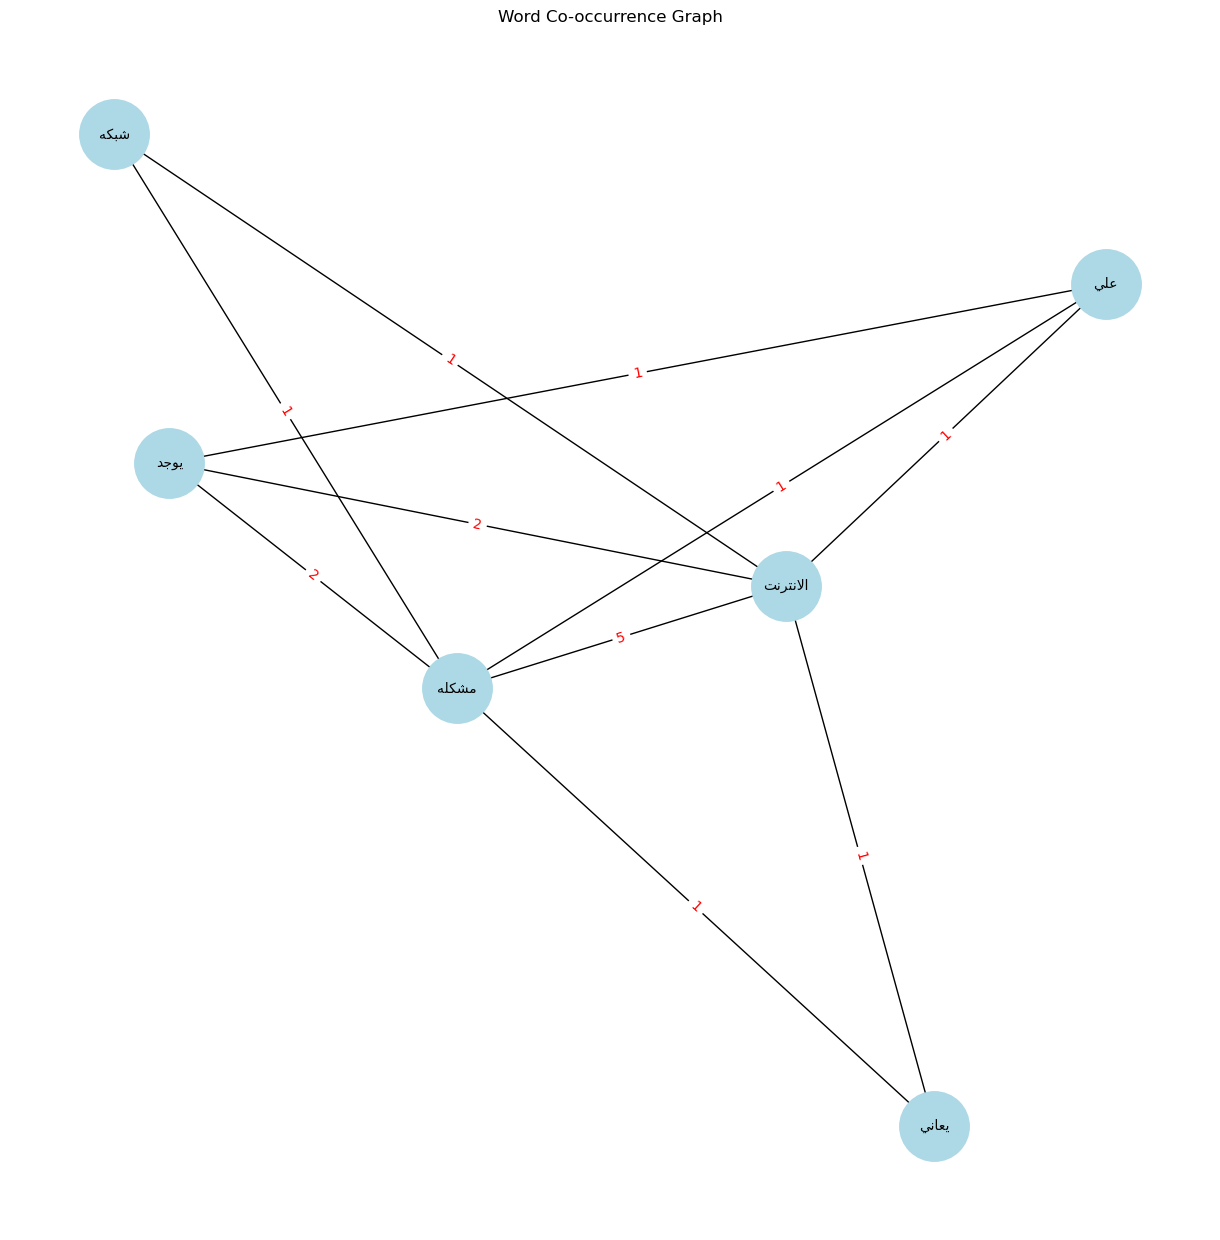

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from nltk.tokenize import word_tokenize
import arabic_reshaper
from bidi.algorithm import get_display

def reshape_arabic(text):
    return get_display(arabic_reshaper.reshape(text))

complaints = sorted_cosine['Preprocessed CASE_DESC'].head(5).tolist()

G = nx.Graph()

# Dictionary to keep track of co-occurrences across all sentences
co_occurrences = {}

# Process each sentence
for complaint in complaints:
    # Tokenize and reshape words
    words = word_tokenize(complaint)
    reshaped_words = [reshape_arabic(word) for word in words]
    # Create a set for unique words in the sentence
    unique_words = set(reshaped_words)

    # Count co-occurrences
    for word1, word2 in combinations(unique_words, 2):
        # Sort the tuple to ensure consistency
        pair = tuple(sorted([word1, word2]))
        # Update the co-occurrences count
        if pair in co_occurrences:
            co_occurrences[pair] += 1
        else:
            co_occurrences[pair] = 1

# Add edges with weights to the graph
for pair, weight in co_occurrences.items():
    G.add_edge(pair[0], pair[1], weight=weight)

# Drawing the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

plt.title("Word Co-occurrence Graph")
plt.show()


In [33]:
co_occurrences = {}
for complaint in complaints:
    # Tokenize and reshape words
    words = word_tokenize(complaint)
    reshaped_words = [reshape_arabic(word) for word in words]
#     unique_words = set(reshaped_words)

    # Count co-occurrences
    for word1, word2 in combinations(reshaped_words, 2):
        # Sort the tuple to ensure consistency
        pair = tuple(sorted([word1, word2]))
        # Update the co-occurrences count
        if pair in co_occurrences:
            co_occurrences[pair] += 1
        else:
            co_occurrences[pair] = 1

# Add edges with weights to the graph
lst = []
for pair, weight in co_occurrences.items():
    lst.append((pair[0], pair[1], weight))
pd.Series(lst).value_counts()

(ﺖﻧﺮﺘﻧﻻﺍ, ﻪﻠﻜﺸﻣ, 5)    1
(ﺪﺟﻮﻳ, ﻪﻠﻜﺸﻣ, 2)       1
(ﺖﻧﺮﺘﻧﻻﺍ, ﺪﺟﻮﻳ, 2)     1
(ﻪﻜﺒﺷ, ﻪﻠﻜﺸﻣ, 1)       1
(ﺖﻧﺮﺘﻧﻻﺍ, ﻪﻜﺒﺷ, 1)     1
(ﺪﺟﻮﻳ, ﻲﻠﻋ, 1)         1
(ﻪﻠﻜﺸﻣ, ﻲﻠﻋ, 1)        1
(ﺖﻧﺮﺘﻧﻻﺍ, ﻲﻠﻋ, 1)      1
(ﻪﻠﻜﺸﻣ, ﻲﻧﺎﻌﻳ, 1)      1
(ﺖﻧﺮﺘﻧﻻﺍ, ﻲﻧﺎﻌﻳ, 1)    1
dtype: int64

In [34]:
complaints

['مشكله الانترنت',
 'يوجد مشكله الانترنت',
 'مشكله شبكه الانترنت',
 'يوجد مشكله علي الانترنت',
 'يعاني مشكله الانترنت']